#  Data Analysis and Visualization

Import in libraries and functions to query the database

In [54]:
import pandas as pd 
import mariadb
from tabulate import tabulate
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium


def query_db(query, printable=True):
    try:
        df = pd.DataFrame()
        with open('../.secrets', 'r') as f:
            CREDITCARD_CAPSTONE_PASSWORD = f.read()

        conn = mariadb.connect(
            user="michaelwschmidt_cc_capstone",
            password=CREDITCARD_CAPSTONE_PASSWORD,
            host="tommy2.heliohost.org",
            port=3306,
            database="michaelwschmidt_creditcard_capstone"
        )

        cur = conn.cursor()
        cur.execute(query)
        rows = cur.fetchall()
        df = pd.read_sql_query(query, conn)

        if printable:
            print(tabulate(df, headers='keys', tablefmt='fancy_grid'))
            print("\n===========================================\n\n")

    except mariadb.Error as e:
        print(f"ERROR connecting to MariaDB:  {e}")

    finally:
        conn.close()
        if not df.empty:
            return df
        else:
            print("DATAFRAME IS EMPTY!  Something went wrong!")


#### Find and plot which transaction type has a high rate of transactions. (Functional Requirements 3.1)

In [28]:
query = "SELECT transaction_type, count(*) as count from cdw_sapp_credit_card GROUP BY 1"
df_cc = query_db(query, False)
df_cc.set_index(df_cc.columns[0], inplace=True)
#df_cc.index = df_cc["transaction_type"]
df_cc

C:\Users\mikey\AppData\Local\Temp\ipykernel_22328\1609124478.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,count
transaction_type,
Bills,6861
Education,6638
Entertainment,6635
Gas,6605
Grocery,6549
Healthcare,6723
Test,6683


''

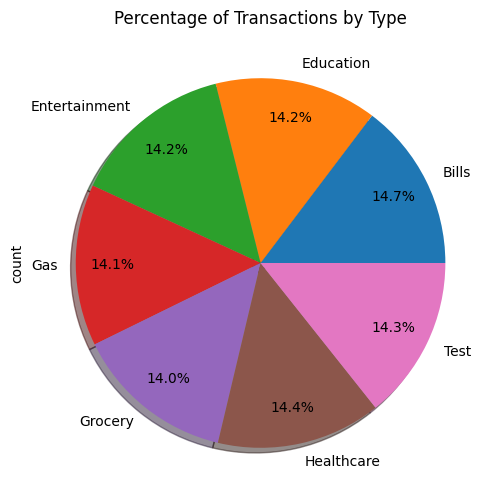

In [51]:
#plt.pie(df_cc["count"], labels=df_cc.index, autopct='%.0f%%')

df_cc["count"].plot(kind='pie',
                    figsize=(15,6),
                    autopct='%1.1f%%',
                    shadow=True,
                    pctdistance=.80
                    )

plt.title("Percentage of Transactions by Type")


;

''

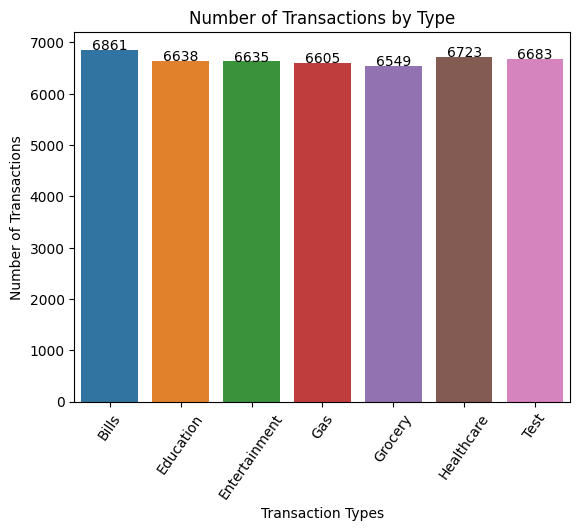

In [49]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

#df_cc_trans = query_db("SELECT * FROM cdw_sapp_credit_card", False)
sns.barplot(x=df_cc.index, y="count", data=df_cc)
plt.xticks(rotation=55)
addlabels(df_cc.index, df_cc["count"])
plt.title("Number of Transactions by Type")
plt.xlabel("Transaction Types")
plt.ylabel("Number of Transactions")
;

#### Find and plot which state has a high number of customers. (Functional Requirements 3.2)

In [60]:
df_cust = query_db("SELECT cust_state, count(*) count FROM cdw_sapp_customer GROUP BY cust_state", False)
df_cust

C:\Users\mikey\AppData\Local\Temp\ipykernel_22328\2558202137.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,cust_state,count
0,AL,5
1,AR,5
2,CA,45
3,CT,14
4,FL,64
5,GA,73
6,IA,21
7,IL,58
8,IN,13
9,KY,17


In [61]:
usa_geo = 'https://github.com/python-visualization/folium/blob/main/examples/data/us-states.json'
us_map = folium.Map(location=[38.27312,-98.5821872], zoom_start=5)

us_map.choropleth(
            geo_data = usa_geo,
            data = df_cust,
            columns = ['cust_state','count'],
            key_on='feature.id',
            fill_color='YlOrRd',
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name='Number of Customers',
            reset=True
)

us_map

c:\Users\mikey\AppData\Local\Programs\Python\Python310\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


JSONDecodeError: Expecting value: line 8 column 1 (char 7)

#### Find and plot the sum of all transactions for the top 10 customers, and which customer has the highest transaction amount. 
Hint (use CUST_SSN). Functional Requirements 3.3